# **Importing The Data**

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv('/content/sentimentdataset.csv')

In [ ]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [ ]:
data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [ ]:
data['Text']

,Text
0,Enjoying a beautiful day at the park! ...
1,Traffic was terrible this morning. ...
2,Just finished an amazing workout! 💪 ...
3,Excited about the upcoming weekend getaway! ...
4,Trying out a new recipe for dinner tonight. ...
...,...
727,Collaborating on a science project that receiv...
728,Attending a surprise birthday party organized ...
729,Successfully fundraising for a school charity ...
730,"Participating in a multicultural festival, cel..."


In [ ]:
data.drop(['Timestamp',	'User',	'Platform',	'Hashtags',	'Retweets',	'Likes',	'Country',	'Year',	'Month',	'Day',	'Hour'], axis=1, inplace=True)

In [ ]:
data.drop(['Unnamed: 0.1',	'Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

,0
Text,0
Sentiment,0


In [ ]:
data.shape

(732, 2)

In [ ]:
data.head()

,Text,Sentiment
0,Enjoying a beautiful day at the park! ...,Positive
1,Traffic was terrible this morning. ...,Negative
2,Just finished an amazing workout! 💪 ...,Positive
3,Excited about the upcoming weekend getaway! ...,Positive
4,Trying out a new recipe for dinner tonight. ...,Neutral


In [ ]:
data.Sentiment.unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [ ]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(sentiment):
    score = analyzer.polarity_scores(sentiment)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
sentiments=data['Sentiment'].tolist()
sentiments=[get_vader_sentiment(sentiment) for sentiment in sentiments]
data['Category']=pd.Series(sentiments)
data['Category'].value_counts()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.8 MB/s eta 0:00:00


,count
Category,
Positive,378
Negative,183
Neutral,171


In [ ]:
def label(category):
  if category == 'Positive':
    return 1
  elif category == 'Neutral':
    return 0
  else:
    return 1
data['Category']=data['Category'].apply(lambda x: label(x))

# **Data Cleaning and Preprocessing**

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [ ]:
ps = PorterStemmer()

In [ ]:
data.shape

(732, 3)

In [ ]:
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z\s]', ' ', str(data['Text'].iloc[i]))
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

# **Creating The Bag Of Words Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=700)
X = cv.fit_transform(corpus).toarray()

In [ ]:
Y = data['Category'].values

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42 )

# \# **Training Model Using Logistic Regression classifier**

In [ ]:
from sklearn.linear_model import LogisticRegression
sentiment_analysis_model = LogisticRegression().fit(X_train, Y_train)

In [ ]:
y_pred = sentiment_analysis_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(Y_test, y_pred)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

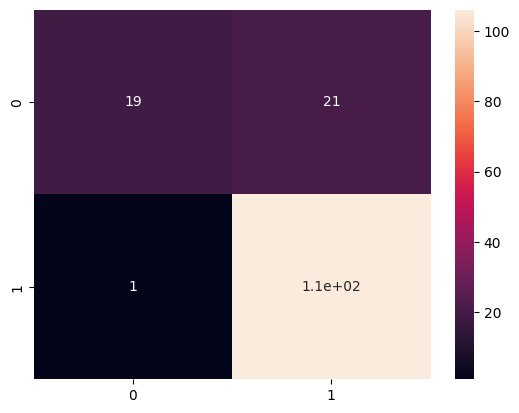

In [ ]:
sns.heatmap(confusion_m, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classification_r = classification_report(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)


In [ ]:
print(classification_r)
accuracy

              precision    recall  f1-score   support

           0       0.95      0.47      0.63        40
           1       0.83      0.99      0.91       107

    accuracy                           0.85       147
   macro avg       0.89      0.73      0.77       147
weighted avg       0.87      0.85      0.83       147



0.8503401360544217